In [ ]:
import cv2 
import os
import shutil
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf

In [ ]:
# Active local webcam
camera = cv2.VideoCapture(0)

In [112]:
# Init base variable 
# List to store images from Image Catcher
images = []
# Current file number to save image
file_number = 0
# Get current directory path
current_dir = os.getcwd()
# Check if 'test_iamges' folder exists, if not create folder
if 'test_images' not in os.listdir(path=current_dir):
    os.mkdir('test_images')
    
while True:
    # Get video frame
    _, camera_frame = camera.read()
    # Draw rectangle on catched image - show area of proper photo
    image_with_border = cv2.rectangle(camera_frame, (100, 100), (500, 500), (255,0,0), 2)
    # Show image with drawn border
    cv2.imshow("Image Catcher", image_with_border)
    # Wait for 1[s] to take an action
    pressed_key = cv2.waitKey(1)
    # If 'q' button clicked, exit "Image Catcher"
    if pressed_key == 113:
        print('Exited camera window')
        # Close all opend Windows
        cv2.destroyAllWindows()
        break
    # If 'space' button clicked, take an image
    if pressed_key == 32:
        # Get clear frame (without border)
        _, image = camera.read()
        # Append list with taken image of size 500x500
        images.append(image[100:500, 100:500])     
        # Set path to save taken image
        image_name = f'test_images/testing_image_{file_number}.jpg'
        # Save image 
        cv2.imwrite(image_name, image[100:500, 100:500])
        # Iterate file name by 1
        file_number += 1
        # Print information about saved image
        print("Image saved to list")

Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Image saved to list
Exited camera window


In [198]:
# Release used device - built-in camera
camera.release()

1/1 [==============================] - 0s 29ms/step


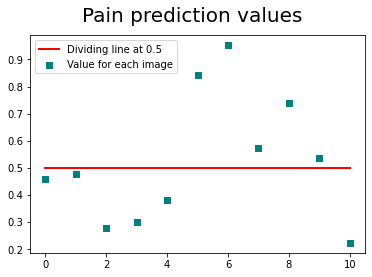

We are Normal Normal People, Yuhu :) !!!
We are Normal Normal People, Yuhu :) !!!
We are Normal Normal People, Yuhu :) !!!
We are Normal Normal People, Yuhu :) !!!
We are Normal Normal People, Yuhu :) !!!
Hello Pain My Old Friend :( 
Hello Pain My Old Friend :( 
Hello Pain My Old Friend :( 
Hello Pain My Old Friend :( 
Hello Pain My Old Friend :( 
We are Normal Normal People, Yuhu :) !!!


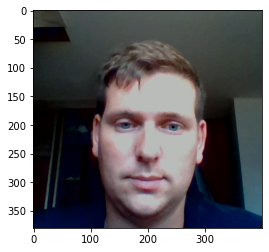

In [197]:
predict_emotion = []
predicted_values = []
# Load pretrain model of CNN
model = load_model(os.path.join('models', 'pain_detection_model_baseCNN.h5'))
# Loop through images list
for index, img in enumerate(images):
    # Resize image to 256x256 size -> expected size by CNN model
    resized_img = tf.image.resize(img, (256, 256))
    # Predict pain image
    predict_emotion.append(model.predict(np.expand_dims(resized_img/255, 0)))
    predicted_values.append(predict_emotion[index][0][0])
    # Show iamges from list in RGB colors
    #cv2.imshow(f'Image_{index}', img)



fig = plt.figure()
plt.scatter(np.arange(0, len(predicted_values),1, dtype = int), np.array(predicted_values),  color='teal', marker ='s', label='Value for each image')
plt.plot(np.arange(0, len(predicted_values),1, dtype = int), [0.5 for i in range(len(predicted_values))], color = 'red', label='Dividing line at 0.5', linewidth=2)
fig.suptitle('Pain prediction values', fontsize=20)
plt.legend(loc='upper left')
plt.show()

for index, value in enumerate(predict_emotion):    
    if value < 0.5:
        print('We are Normal Normal People, Yuhu :) !!!')
        ax[index].imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
        ax[index].title.set_text(value[0][0])
    else:
        print("Hello Pain My Old Friend :( ")
        ax[index].imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
        ax[index].title.set_text(value[0][0])
    
# Waiting for key action
cv2.waitKey(0)
# Closing all opend windows with images
cv2.destroyAllWindows()

# Print image using matplotlib-pyplot
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.show()

In [189]:
predict_emotiond

[array([[0.45924228]], dtype=float32),
 array([[0.47854888]], dtype=float32),
 array([[0.2773008]], dtype=float32),
 array([[0.29910624]], dtype=float32),
 array([[0.38184842]], dtype=float32),
 array([[0.84376436]], dtype=float32),
 array([[0.95261115]], dtype=float32),
 array([[0.5725951]], dtype=float32),
 array([[0.7400095]], dtype=float32),
 array([[0.53535855]], dtype=float32),
 array([[0.22197802]], dtype=float32)]

In [178]:
predict_emotion
np.array(predicted_values)


array([0.45924228, 0.47854888, 0.2773008 , 0.29910624, 0.38184842,
       0.84376436, 0.95261115, 0.5725951 , 0.7400095 , 0.53535855,
       0.22197802], dtype=float32)

In [200]:
# Delete 'test_images' directory after finshed work - optional to use
shutil.rmtree(os.path.join(current_dir, 'test_images'))


FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'D:\\AGH\\Magisterskie\\Program_MGR\\Jupyter_Notebook\\test_images'

In [10]:
# import numpy as np
# import cv2

# cap = cv2.VideoCapture(0)

# while(True):
#     # Capture frame-by-frame
#     ret, frame = cap.read()

#     # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Display the resulting frame
#     cv2.imshow('frame',gray)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# # When everything done, release the capture
# cap.release()
# cv2.destroyAllWindows()

In [1]:
# import cv2

# cam = cv2.VideoCapture(0)

# cv2.namedWindow("test")

# img_counter = 0

# while True:
#     ret, frame = cam.read()
#     if not ret:
#         print("failed to grab frame")
#         break
#     cv2.imshow("test", frame)

#     k = cv2.waitKey(1)
#     if k%256 == 27:
#         # ESC pressed
#         print("Escape hit, closing...")
#         break
#     elif k%256 == 32:
#         # SPACE pressed
#         img_name = "opencv_frame_{}.png".format(img_counter)
#         cv2.imwrite(img_name, frame)
#         print("{} written!".format(img_name))
#         img_counter += 1

# cam.release()

# cv2.destroyAllWindows()

opencv_frame_0.png written!
opencv_frame_1.png written!
Escape hit, closing...
